In [0]:
# EDA:

# Univariate Analysis:

    # Categorical: Proportions Test

    # Numeric: Normality Test

# Bi-variate Analysis:

    # Cat-Cat: Chi square test

    # Cat- Numeric: Mean Test
        # two means: 2 groups, independent
        # two means: 2 groups, dependent
        # more than two means: ANOVA

    # Numeric-Numeric: Correlations Test

# Multivariate Analysis:

    # Correlations test

In [0]:
import pandas as pd
import numpy as np

In [0]:
#https://www.kaggle.com/c/demand-forecasting-kernels-only/data
# download train.csv
df = pd.read_csv('/Users/pradmishra/Documents/train.csv')

In [0]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [0]:
set(df.store)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [0]:
df.shape

(913000, 4)

In [0]:
# Which stores are selling the most, are there any differences between the best selling store and others?

# Which are the lowest selling stores?

In [0]:
df.groupby(['store'])['sales']

In [0]:
# which stores face lowest/highest footfall?

In [0]:
df.store.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64

In [0]:
df.item.value_counts()

50    18260
13    18260
23    18260
22    18260
21    18260
20    18260
19    18260
18    18260
17    18260
16    18260
15    18260
14    18260
12    18260
49    18260
11    18260
10    18260
9     18260
8     18260
7     18260
6     18260
5     18260
4     18260
3     18260
2     18260
24    18260
25    18260
26    18260
27    18260
48    18260
47    18260
46    18260
45    18260
44    18260
43    18260
42    18260
41    18260
40    18260
39    18260
38    18260
37    18260
36    18260
35    18260
34    18260
33    18260
32    18260
31    18260
30    18260
29    18260
28    18260
1     18260
Name: item, dtype: int64

In [0]:
from scipy.stats import stats

In [0]:
results = stats.f_oneway(df[df.store==1]['sales'],
                        df[df.store==2]['sales'],
                        df[df.store==3]['sales'])

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


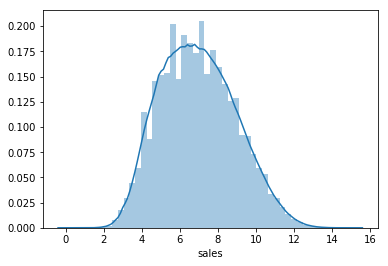

In [0]:
import seaborn as sns
sns.distplot(np.sqrt(df.sales))

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [0]:
output = pairwise_tukeyhsd(df.sales,df.store)

In [0]:
output.meandiffs

array([ 19.76478642,  12.26222344,   7.63456736,  -7.49821468,
        -7.53486309, -10.90464403,  16.87366922,   7.78064622,
        11.44090909,  -7.50256298, -12.13021906, -27.2630011 ,
       -27.29964951, -30.66943045,  -2.8911172 , -11.9841402 ,
        -8.32387733,  -4.62765608, -19.76043812, -19.79708653,
       -23.16686747,   4.61144578,  -4.48157722,  -0.82131435,
       -15.13278204, -15.16943045, -18.53921139,   9.23910186,
         0.14607886,   3.80634173,  -0.03664841,  -3.40642935,
        24.3718839 ,  15.2788609 ,  18.93912377,  -3.36978094,
        24.40853231,  15.31550931,  18.97577218,  27.77831325,
        18.68529025,  22.34555312,  -9.093023  ,  -5.43276013,
         3.66026287])

In [0]:
output.summary()

group1,group2,meandiff,lower,upper,reject
1,2,19.7648,19.3665,20.1631,True
1,3,12.2622,11.8639,12.6605,True
1,4,7.6346,7.2363,8.0329,True
1,5,-7.4982,-7.8965,-7.0999,True
1,6,-7.5349,-7.9332,-7.1365,True
1,7,-10.9046,-11.303,-10.5063,True
1,8,16.8737,16.4754,17.272,True
1,9,7.7806,7.3823,8.179,True
1,10,11.4409,11.0426,11.8392,True
2,3,-7.5026,-7.9009,-7.1042,True


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv')

In [0]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
np.array(df1.color.value_counts())

array([11292,  9797,  9542,  8304,  6775,  5422,  2808])

In [0]:
np.array(df1.shape[0])

array(53940)

In [0]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([11292,  9797])
nobs = np.array([53940,53940])
stat, pval = proportions_ztest(counts, nobs)
print('{0:0.3f}'.format(pval))

0.000


In [0]:
from scipy import stats
stats.shapiro(df.sales)

/Applications/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9442825317382812, 0.0)